# ITEM-BASED recommender system

# Packages

In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Dataset

In [2]:
data_skripsi=pd.read_csv('FIX_DATASKRIPSI_NEW.CSV',sep=";", encoding= 'unicode_escape')
data_skripsi

,No,User_id,User_Name,Item_id,Item_name,Rating,PostDate,Bintang_Hotel
0,1,2700,Hendra Hendra,1,Eastparc Hotel Yogyakarta,4.0,08/07/2020,5
1,2,832,AS,1,Eastparc Hotel Yogyakarta,4.2,30/08/2020,5
2,3,4380,NU,1,Eastparc Hotel Yogyakarta,5.0,12/02/2022,5
3,4,3483,Leny Wati,1,Eastparc Hotel Yogyakarta,5.0,11/01/2022,5
4,5,4116,Mujiburahman,1,Eastparc Hotel Yogyakarta,5.0,11/12/2021,5
...,...,...,...,...,...,...,...,...
12522,12523,2023,eric moeljono,110,Swiss-Belboutique Yogyakarta,5.0,22/04/2019,5
12523,12524,1252,christy cussoy,110,Swiss-Belboutique Yogyakarta,5.0,22/04/2019,5
12524,12525,4708,R,110,Swiss-Belboutique Yogyakarta,4.0,27/02/2019,5
12525,12526,1532,dewi martanti,110,Swiss-Belboutique Yogyakarta,4.8,04/02/2019,5


In [3]:
ratings=data_skripsi[['User_id','Item_id','Rating']]
ratings

,User_id,Item_id,Rating
0,2700,1,4.0
1,832,1,4.2
2,4380,1,5.0
3,3483,1,5.0
4,4116,1,5.0
...,...,...,...
12522,2023,110,5.0
12523,1252,110,5.0
12524,4708,110,4.0
12525,1532,110,4.8


In [4]:
hotel=data_skripsi[['Item_id','Item_name','PostDate', 'Bintang_Hotel']]
hotel

,Item_id,Item_name,PostDate,Bintang_Hotel
0,1,Eastparc Hotel Yogyakarta,08/07/2020,5
1,1,Eastparc Hotel Yogyakarta,30/08/2020,5
2,1,Eastparc Hotel Yogyakarta,12/02/2022,5
3,1,Eastparc Hotel Yogyakarta,11/01/2022,5
4,1,Eastparc Hotel Yogyakarta,11/12/2021,5
...,...,...,...,...
12522,110,Swiss-Belboutique Yogyakarta,22/04/2019,5
12523,110,Swiss-Belboutique Yogyakarta,22/04/2019,5
12524,110,Swiss-Belboutique Yogyakarta,27/02/2019,5
12525,110,Swiss-Belboutique Yogyakarta,04/02/2019,5


In [5]:
unique_user = ratings.User_id.nunique(dropna = True)
unique_hotel = ratings.Item_id.nunique(dropna = True)
print("number of unique user:")
print(unique_user)
print("number of unique hotel:")
print(unique_hotel)

number of unique user:
6622
number of unique hotel:
110


In [6]:
#Sparsity Data
total_ratings = unique_user*unique_hotel
rating_present = ratings.shape[0]

ratings_not_provided = total_ratings - rating_present 

print("ratings not provided berarti beberapa user tidak menginap dan memberikan rating di beberapa hotel")
print(ratings_not_provided)
print("Nilai Sparsity dari data :")
print(ratings_not_provided / total_ratings)

ratings not provided berarti beberapa user tidak menginap dan memberikan rating di beberapa hotel
715893
Nilai Sparsity dari data :
0.9828025040498614


# Exploratory Data Analysis (EDA)

In [7]:
# Deskripsikan dataset
data_skripsi.describe()

# Lihat informasi dataset
data_skripsi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12527 entries, 0 to 12526
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   No             12527 non-null  int64  
 1   User_id        12527 non-null  int64  
 2   User_Name      12527 non-null  object 
 3   Item_id        12527 non-null  int64  
 4   Item_name      12527 non-null  object 
 5   Rating         12527 non-null  float64
 6   PostDate       12527 non-null  object 
 7   Bintang_Hotel  12527 non-null  int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 783.1+ KB


In [8]:
# 1)plot ratings count which gives information about which rating(on scale of 0 t0 5) is more frequent
rating_hotel = pd.DataFrame(ratings.groupby('Rating').size(),columns=['count'])
rating_hotel

,count
Rating,
1.0,97
1.2,4
1.4,23
1.6,24
1.8,43
2.0,201
2.2,111
2.4,115
2.6,137


Jumlah untuk setiap rating


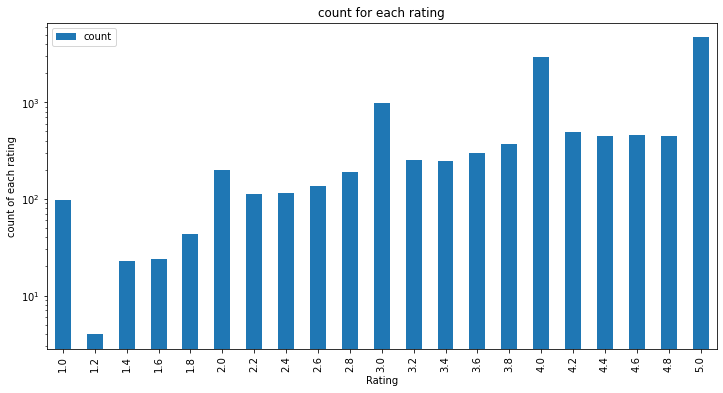

In [9]:
# plot a bar plot to visualise the ratings
rating_hotel_for_vis = rating_hotel
ax = rating_hotel_for_vis.reset_index().rename(columns = {'index':'Rating'}).plot(
    x='Rating',
    y='count',
    logy = True,
    kind='bar',
    title='count for each rating',
    figsize=(12,6)
)
ax.set_xlabel('Rating')
ax.set_ylabel('count of each rating')
print("Jumlah untuk setiap rating")

In [10]:
# 2) plot rating frequency of each hotel(how many time a movie has been rated)
hotel_freq = pd.DataFrame(ratings.groupby('Item_id').size(),columns=['count'])
hotel_freq

,count
Item_id,
1,161
2,163
3,171
4,190
5,28
...,...
106,80
107,109
108,176


In [11]:
hotel_freq.mean()

count    113.881818
dtype: float64

Text(0, 0.5, 'rating frequency')

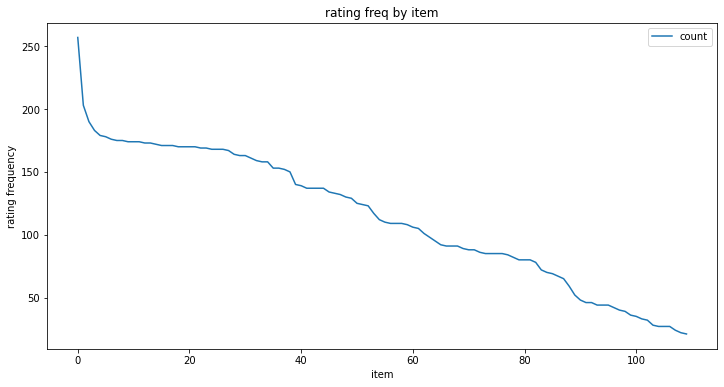

In [12]:
# plot rating freq
ax  = hotel_freq.sort_values('count',ascending=False).reset_index(drop=True).plot(
      title='rating freq by item',
      figsize=(12,6),
      
)
ax.set_xlabel("item")
ax.set_ylabel("rating frequency")

In [13]:
user_htl = pd.DataFrame(ratings.groupby('User_id').size(),columns=['count'])
user_htl.head()

,count
User_id,
1,18
2,1
3,1
4,1
5,68


Text(0, 0.5, 'rating frequency')

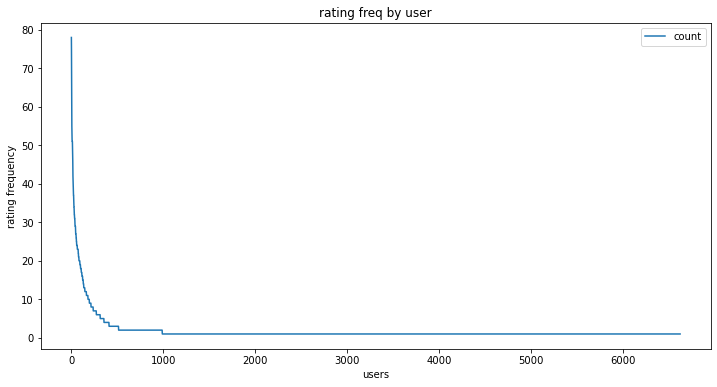

In [14]:
# plot rating freq
ax  = user_htl.sort_values('count',ascending=False).reset_index(drop=True).plot(
      title='rating freq by user',
      figsize=(12,6),
      
)
ax.set_xlabel("users")
ax.set_ylabel("rating frequency")

In [15]:
n_ratings = len(ratings)
n_hotel= ratings['Item_id'].nunique()
n_users = ratings['User_id'].nunique()

print(f"Number of ratings: {n_ratings}")
print(f"Number of unique Item id: {n_hotel}")
print(f"Number of unique users: {n_users}")
print(f"Average number of ratings per user: {round(n_ratings/n_users, 2)}")
print(f"Average number of ratings per hotel: {round(n_ratings/n_hotel, 2)}")

Number of ratings: 12527
Number of unique Item id: 110
Number of unique users: 6622
Average number of ratings per user: 1.89
Average number of ratings per hotel: 113.88


In [16]:
user_freq = ratings[['User_id', 'Item_id']].groupby('User_id').count().reset_index()
user_freq.columns = ['User_id', 'n_ratings']
user_freq.head()

,User_id,n_ratings
0,1,18
1,2,1
2,3,1
3,4,1
4,5,68


Text(0.5, 1.0, 'Distribution of hotel ratings')

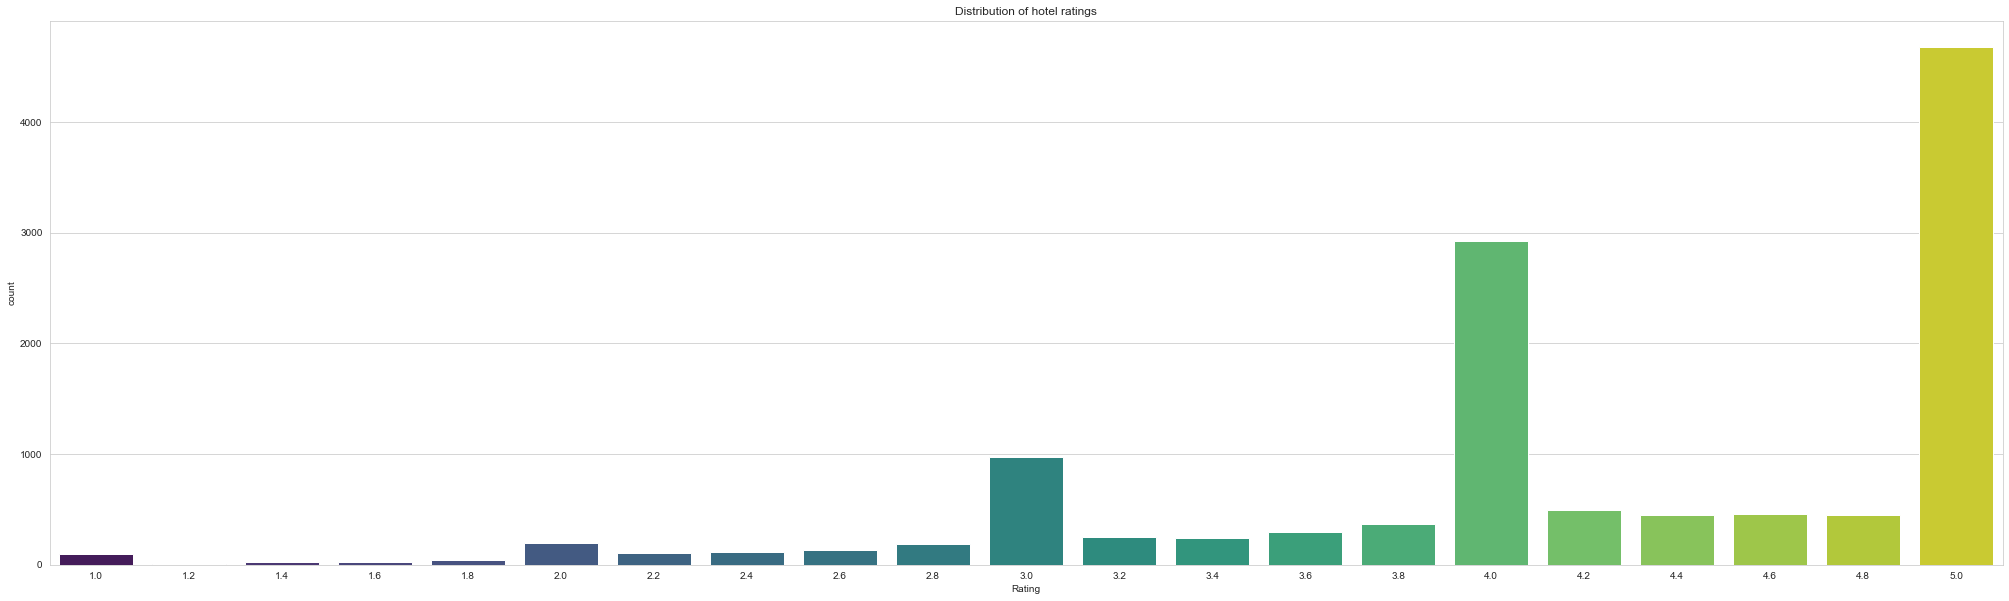

In [17]:
sns.set_style("whitegrid")
plt.figure(figsize=(35,10))
plt.subplot()
ax = sns.countplot(x="Rating", data=ratings, palette="viridis")
plt.title("Distribution of hotel ratings")


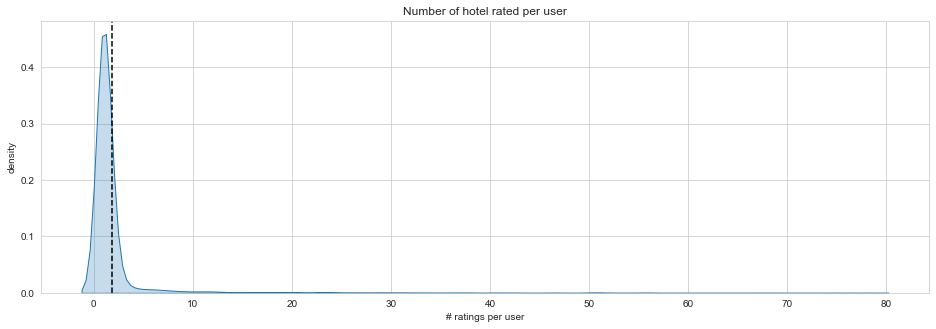

In [18]:
plt.figure(figsize=(35,5))
plt.subplot(1,2,1)
ax = sns.kdeplot(user_freq['n_ratings'], shade=True, legend=False)
plt.axvline(user_freq['n_ratings'].mean(), color="k", linestyle="--")
plt.xlabel("# ratings per user")
plt.ylabel("density")

plt.title("Number of hotel rated per user")
plt.show()

In [19]:
skirpsii=data_skripsi.drop_duplicates('Item_name')
skirpsii.head()

,No,User_id,User_Name,Item_id,Item_name,Rating,PostDate,Bintang_Hotel
0,1,2700,Hendra Hendra,1,Eastparc Hotel Yogyakarta,4.0,08/07/2020,5
161,162,428,Ambrosius Alexander Sutanto,2,Grand Ambarrukmo Yogyakarta,5.0,28/03/2020,4
324,325,6589,Zepri Wicaksono,3,Kotta GO Yogyakarta,5.0,08/05/2021,3
495,496,701,Apriyani Husin,4,Crystal Lotus Hotel Yogyakarta,5.0,16/10/2021,4
685,686,867,Astrid Melisa,5,Omah Manis Guesthouse Yogyakarta,5.0,13/02/2022,3


In [20]:
# 2) plot rating frequency of each hotel(how many time a movie has been rated)
bintang_freq = pd.DataFrame(skirpsii.groupby('Bintang_Hotel').size(),columns=['count'])
bintang_freq.head()

,count
Bintang_Hotel,
1,14
2,24
3,38
4,23
5,11


Text(0.5, 1.0, 'Distribution of Bintang Hotel')

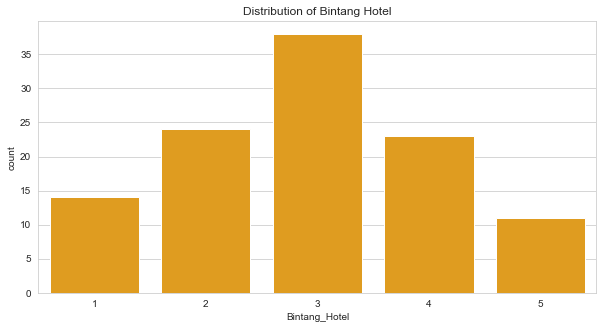

In [21]:

plt.figure(figsize=(10,5))
plt.subplot()
ax = sns.countplot(x="Bintang_Hotel", data=skirpsii, color="orange")
plt.title("Distribution of Bintang Hotel")

# MATRIX

In [22]:
#creating the user-item interaction matrix
data_matrix_kosong = data_skripsi.pivot_table(index='Item_name', columns='User_Name', values='Rating').fillna('Kosong')
data_matrix_kosong.head(10)

User_Name,A,A AGUSLIMI SHAFIRA PUTRI AP,A Dian Christianti,AA,AAN AMBARYATI,AB,ABDUL WAHAB ISKANDAR,AC,ACHMAT LUTHFI YAKIM,AD,...,yuri yah,yusuf satriyo,yuyun sutaji,yuzon erman,zahra azzahra,zainul arifin,zanni erdiawan saputra,zevina Liemahassana,ziah nur aisjah,zuraidah fitri lubis
Item_name,,,,,,,,,,,,,,,,,,,,,
@HOM Premiere Timoho,Kosong,Kosong,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
ARTOTEL Suites Bianti - Yogyakarta,Kosong,Kosong,Kosong,5.0,Kosong,3.0,Kosong,Kosong,Kosong,4.0,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Abadi Hotel Malioboro Yogyakarta by Tritama Hospitality,5.0,Kosong,Kosong,3.6,Kosong,2.0,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,4.0,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Adhisthana Hotel,Kosong,Kosong,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,Kosong,1.6,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Airlangga Hotel,Kosong,Kosong,Kosong,4.0,Kosong,Kosong,4.0,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Allstay Ecotel Yogyakarta,Kosong,Kosong,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Amaris Hotel Malioboro,Kosong,Kosong,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Arte Hotel Malioboro Yogyakarta,Kosong,Kosong,Kosong,4.0,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong
Atrium Premiere Hotel Yogyakarta Ambarukmo,Kosong,Kosong,Kosong,4.0,Kosong,5.0,Kosong,Kosong,Kosong,Kosong,...,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong,Kosong


In [23]:
df = data_skripsi.pivot_table(index='Item_name', columns='User_Name', values='Rating').fillna(0)
df1 = df.copy()
df1

User_Name,A,A AGUSLIMI SHAFIRA PUTRI AP,A Dian Christianti,AA,AAN AMBARYATI,AB,ABDUL WAHAB ISKANDAR,AC,ACHMAT LUTHFI YAKIM,AD,...,yuri yah,yusuf satriyo,yuyun sutaji,yuzon erman,zahra azzahra,zainul arifin,zanni erdiawan saputra,zevina Liemahassana,ziah nur aisjah,zuraidah fitri lubis
Item_name,,,,,,,,,,,,,,,,,,,,,
@HOM Premiere Timoho,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
ARTOTEL Suites Bianti - Yogyakarta,0.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Abadi Hotel Malioboro Yogyakarta by Tritama Hospitality,5.0,0.0,0.0,3.6,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
Adhisthana Hotel,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Airlangga Hotel,0.0,0.0,0.0,4.0,0.0,0.0,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Votel Maerakatja Yogyakarta,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
YATS Colony,0.0,0.0,0.0,3.2,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Yellow Star Ambarrukmo Hotel,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
user_index = df1.columns.tolist()
user_index

['A',
 'A AGUSLIMI SHAFIRA PUTRI AP',
 'A Dian Christianti',
 'AA',
 'AAN AMBARYATI',
 'AB',
 'ABDUL WAHAB ISKANDAR',
 'AC',
 'ACHMAT LUTHFI YAKIM',
 'AD',
 'ADI PRANTA SEMBIRING KALOKO',
 'ADIADHA TRI ARIPRADINA pradina',
 'ADIANTO ADIANTO',
 'ADITYA APRIANTA',
 'ADNI MAIWASTIWI',
 'AE',
 'AF',
 'AFAN OKKY',
 'AFIAT NELLY',
 'AG',
 'AGENG PRATIWI',
 'AH',
 'AHMAD FIRDAUS',
 'AI',
 'AJ',
 'AJIANTO MULYAWAN',
 'AK',
 'AKBAR PRANANTA',
 'AL',
 'AL FATH FILSAFAH',
 'ALEX HENDRA SIREGAR',
 'ALFA SHALATINE TEWA',
 'AM',
 'AMC Hermawan Harry Nugroho',
 'AMELIA Dwi Rara Adistha',
 'AN',
 'ANDREANI SUCIANI TANZIHAH',
 'ANDRI SAPUTRO',
 'ANDRIANA KUMALA DEWI',
 'ANDRIE DARMA NUGROHO',
 'ANDY ANDY',
 'ANGGA KUSUMA WARDANA',
 'ANIS SETYANI',
 'ANITA DWI ASTUTI',
 'ANTONIUS FERNANDO KUSWARA',
 'ANWAR ANWAR',
 'AO',
 'AP',
 'AQ',
 'AQNI Hanifa',
 'AR',
 'ARIE SAEPULLOH',
 'ARIF BAYU AJI',
 'ARIFIN MAKFUL',
 'ARIS ARIYANTO',
 'ARNO ALAM',
 'ARTIKA Sutopo',
 'ARYA JABAR',
 'AS',
 'AT',
 'AU',
 'AULIA

# Cosine Similarity

In [25]:
# define the model
from sklearn.neighbors import NearestNeighbors

In [26]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values, n_neighbors=15)

In [27]:
indices

array([[  0,  36,  61, ...,  43,  41, 102],
       [  1,  36,  52, ...,  35,  40,   5],
       [  2, 104,  36, ...,  70,   3,  59],
       ...,
       [107,   5,   8, ...,  77,  30,   3],
       [108,  52,   5, ...,  36,  22,  27],
       [109,  31,  26, ...,  32, 102,  76]], dtype=int64)

In [28]:
user_index = df.columns.tolist()
user_index

['A',
 'A AGUSLIMI SHAFIRA PUTRI AP',
 'A Dian Christianti',
 'AA',
 'AAN AMBARYATI',
 'AB',
 'ABDUL WAHAB ISKANDAR',
 'AC',
 'ACHMAT LUTHFI YAKIM',
 'AD',
 'ADI PRANTA SEMBIRING KALOKO',
 'ADIADHA TRI ARIPRADINA pradina',
 'ADIANTO ADIANTO',
 'ADITYA APRIANTA',
 'ADNI MAIWASTIWI',
 'AE',
 'AF',
 'AFAN OKKY',
 'AFIAT NELLY',
 'AG',
 'AGENG PRATIWI',
 'AH',
 'AHMAD FIRDAUS',
 'AI',
 'AJ',
 'AJIANTO MULYAWAN',
 'AK',
 'AKBAR PRANANTA',
 'AL',
 'AL FATH FILSAFAH',
 'ALEX HENDRA SIREGAR',
 'ALFA SHALATINE TEWA',
 'AM',
 'AMC Hermawan Harry Nugroho',
 'AMELIA Dwi Rara Adistha',
 'AN',
 'ANDREANI SUCIANI TANZIHAH',
 'ANDRI SAPUTRO',
 'ANDRIANA KUMALA DEWI',
 'ANDRIE DARMA NUGROHO',
 'ANDY ANDY',
 'ANGGA KUSUMA WARDANA',
 'ANIS SETYANI',
 'ANITA DWI ASTUTI',
 'ANTONIUS FERNANDO KUSWARA',
 'ANWAR ANWAR',
 'AO',
 'AP',
 'AQ',
 'AQNI Hanifa',
 'AR',
 'ARIE SAEPULLOH',
 'ARIF BAYU AJI',
 'ARIFIN MAKFUL',
 'ARIS ARIYANTO',
 'ARNO ALAM',
 'ARTIKA Sutopo',
 'ARYA JABAR',
 'AS',
 'AT',
 'AU',
 'AULIA

In [29]:
distances.tolist()

[[0.0,
  0.8571433438198809,
  0.8611054565210775,
  0.8688543818659077,
  0.869736824532931,
  0.8800017494097527,
  0.8804394100260928,
  0.887111988436904,
  0.8872870077667018,
  0.8879913881263506,
  0.8886006105742981,
  0.889232769215945,
  0.8905519300987479,
  0.8922638147649868,
  0.8923658692603472],
 [0.0,
  0.8184074682958716,
  0.8420453378080388,
  0.8421653995819647,
  0.8470463999481007,
  0.8486706261027888,
  0.8499382280285122,
  0.8516278059439173,
  0.8523673803994579,
  0.8530204218424149,
  0.8550308798153494,
  0.8557708139556985,
  0.8570398890118426,
  0.8590952195468858,
  0.8595128796540881],
 [2.220446049250313e-16,
  0.8420931627571486,
  0.842219922379772,
  0.8533439500798518,
  0.8536747115237613,
  0.8566573819716634,
  0.8567425955801491,
  0.8570976009977654,
  0.8575038394576836,
  0.857945813856289,
  0.8603093464978767,
  0.8603739735914802,
  0.8611499073119627,
  0.8618400863434187,
  0.8635524101010087],
 [0.0,
  0.8138970455317558,
  0.816537

In [30]:
index_for_hotel = df.index.tolist()
index_for_hotel

[' @HOM Premiere Timoho',
 'ARTOTEL Suites Bianti - Yogyakarta',
 'Abadi Hotel Malioboro Yogyakarta by Tritama Hospitality',
 'Adhisthana Hotel ',
 'Airlangga Hotel',
 'Allstay Ecotel Yogyakarta',
 'Amaris Hotel Malioboro',
 'Arte Hotel Malioboro Yogyakarta',
 'Atrium Premiere Hotel Yogyakarta Ambarukmo',
 'Aveta Hotel Malioboro',
 'Banana Homestay Prawirodirjan',
 'Best City Hotel',
 'Brothers Inn Babarsari',
 'Burza Hotel Yogyakarta',
 'Cavinton Hotel Yogyakarta by Tritama Hospitality',
 'Chrissant Hotel',
 'Crystal Lotus Hotel Yogyakarta',
 "D'Senopati Malioboro Grand Hotel",
 'DKayon Hotel Demangan Yogyakarta',
 'Dem Ayem Heritage Guest House',
 'Density Living',
 'Dermaga Keluarga Hotel Wirobrajan',
 'EDU Hostel',
 'Eastparc Hotel Yogyakarta',
 'Eclipse Hotel',
 'Forriz Hotel Yogyakarta',
 'Front One Cabin Malioboro Yogyakarta',
 'GAIA Cosmo Hotel',
 'Grand Ambarrukmo Yogyakarta',
 'Grand Inna Malioboro',
 'Grand Kangen Hotel Urip Sumoharjo Yogyakarta',
 'Grand Keisha Yogyakarta',

In [31]:
index_for_hotel = df.index.tolist().index('Grand Zuri Malioboro Yogyakarta') # it returns 0
sim_hotel = indices[index_for_hotel].tolist() # make list for similar movies
hotel_distance = distances[index_for_hotel].tolist() # the list for distances of similar movies
id_hotel = sim_hotel.index(index_for_hotel) # get the position of the movie itself in indices and distances
sim_hotel.remove(index_for_hotel) # remove the movie itself in indices
hotel_distance.pop(id_hotel) # remove the movie itself in distances

print('The Nearest hotel to Grand Zuri Malioboro Yogyakarta:', sim_hotel)
print('The Distance from Grand Zuri Malioboro Yogyakarta:', hotel_distance)

The Nearest hotel to Grand Zuri Malioboro Yogyakarta: [22, 8, 14, 26, 5, 36, 55, 100, 102, 52, 30, 16, 61, 96]
The Distance from Grand Zuri Malioboro Yogyakarta: [0.8476903654193607, 0.8580900243793789, 0.8736078502904916, 0.8743211404596987, 0.8748282161212771, 0.8760537931912133, 0.8775212691631773, 0.8817595164651124, 0.8840326305395125, 0.8882686935845506, 0.8891222394597228, 0.8911644015780885, 0.8958108366615523, 0.8983672805283808]


In [32]:
sim_hotel

[22, 8, 14, 26, 5, 36, 55, 100, 102, 52, 30, 16, 61, 96]

In [33]:
hotel_similarity = [1-x for x in hotel_distance] # # inverse distance   
hotel_similarity

[0.15230963458063929,
 0.14190997562062113,
 0.1263921497095084,
 0.12567885954030134,
 0.12517178387872285,
 0.12394620680878665,
 0.1224787308368227,
 0.11824048353488759,
 0.11596736946048747,
 0.11173130641544937,
 0.1108777605402772,
 0.10883559842191148,
 0.10418916333844774,
 0.10163271947161923]

In [34]:
sim_hotel

[22, 8, 14, 26, 5, 36, 55, 100, 102, 52, 30, 16, 61, 96]

In [35]:
df.iloc[sim_hotel[0]]

User_Name
A                              3.0
A AGUSLIMI SHAFIRA PUTRI AP    0.0
A Dian Christianti             0.0
AA                             0.0
AAN AMBARYATI                  0.0
                              ... 
zainul arifin                  0.0
zanni erdiawan saputra         0.0
zevina Liemahassana            0.0
ziah nur aisjah                0.0
zuraidah fitri lubis           0.0
Name: EDU Hostel, Length: 6654, dtype: float64

Prediksi Grand Zuri oleh user AA

In [36]:
sum(hotel_similarity)

1.6893617421584826

In [37]:
predicted_rating = (hotel_similarity[0]*df.iloc[sim_hotel[0],3] + 
                    hotel_similarity[1]*df.iloc[sim_hotel[1],3]+
                   hotel_similarity[2]*df.iloc[sim_hotel[2],3]+
                    hotel_similarity[3]*df.iloc[sim_hotel[3],3]+
                   hotel_similarity[4]*df.iloc[sim_hotel[4],3]+
                   hotel_similarity[5]*df.iloc[sim_hotel[5],3]+
                   hotel_similarity[6]*df.iloc[sim_hotel[6],3]+
                   hotel_similarity[7]*df.iloc[sim_hotel[7],3]+
                   hotel_similarity[8]*df.iloc[sim_hotel[8],3]+
                   hotel_similarity[9]*df.iloc[sim_hotel[9],3]+
                   hotel_similarity[10]*df.iloc[sim_hotel[10],3]+
                   hotel_similarity[11]*df.iloc[sim_hotel[11],3]+
                   hotel_similarity[12]*df.iloc[sim_hotel[12],3]+
                   hotel_similarity[13]*df.iloc[sim_hotel[13],3])/sum(hotel_similarity)
print(predicted_rating)

2.328117966114948


In [38]:
rmse = (predicted_rating - 0)/12527
rmse

0.00018584800559710607

# Get the top-N recommendations For User

In [42]:
def recommend_hotels(user, num_recommended_hotel):

  print('Hotel yang sudah diberikan rating oleh {} yaitu \n'.format(user))

  for m in df[df[user] > 0][user].index.tolist():
    print(m)
  
  print('\n')

  recommended_hotel = []

  for m in df[df[user] == 0].index.tolist():

    index_df = df.index.tolist().index(m)
    predicted_rating = df1.iloc[index_df, df1.columns.tolist().index(user)]
    recommended_hotel.append((m, predicted_rating))

  sorted_rm = sorted(recommended_hotel, key=lambda x:x[1], reverse=True)
  
  print('Hasil rekomendasinya yaitu \n')
  rank = 1
  for recommended_hotel in sorted_rm[:num_recommended_hotel]:
    
    print('{}: {} - dengan prediksi rating: {}'.format(rank, recommended_hotel[0], recommended_hotel[1]))
    rank = rank + 1

In [43]:
def hotels_recommender(user, num_neighbors, num_recommendation):
  
  number_neighbors = num_neighbors

  knn = NearestNeighbors(metric='cosine', algorithm='brute')
  knn.fit(df.values)
  distances, indices = knn.kneighbors(df.values, n_neighbors=number_neighbors)

  user_index = df.columns.tolist().index(user)

  for m,t in list(enumerate(df.index)):
    if df.iloc[m, user_index] == 0:
      sim_hotels = indices[m].tolist()
      hotels_distances = distances[m].tolist()
    
      if m in sim_hotels:
        id_hotels = sim_hotels.index(m)
        sim_hotels.remove(m)
        hotels_distances.pop(id_hotels) 

      else:
        sim_hotels = sim_hotels[:num_neighbors-1]
        hotels_distances = hotels_distances[:num_neighbors-1]
           
      hotels_similarity = [1-x for x in hotels_distances]
      hotels_similarity_copy = hotels_similarity.copy()
      nominator = 0

      for s in range(0, len(hotels_similarity)):
        if df.iloc[sim_hotels[s], user_index] == 0:
          if len(hotels_similarity_copy) == (number_neighbors - 1):
            hotels_similarity_copy.pop(s)
          
          else:
            hotels_similarity_copy.pop(s-(len(hotels_similarity)-len(hotels_similarity_copy)))
            
        else:
          nominator = nominator + hotels_similarity[s]*df.iloc[sim_hotels[s],user_index]
          
      if len(hotels_similarity_copy) > 0:
        if sum(hotels_similarity_copy) > 0:
          predicted_r = nominator/sum(hotels_similarity_copy)
        
        else:
          predicted_r = 0

      else:
        predicted_r = 0
        
      df1.iloc[m,user_index] = predicted_r
  recommend_hotels(user,num_recommendation)

In [44]:
hotels_recommender('AA', 15, 15)

Hotel yang sudah diberikan rating oleh AA yaitu 

 @HOM Premiere Timoho
ARTOTEL Suites Bianti - Yogyakarta
Abadi Hotel Malioboro Yogyakarta by Tritama Hospitality
Adhisthana Hotel 
Airlangga Hotel
Allstay Ecotel Yogyakarta
Amaris Hotel Malioboro
Arte Hotel Malioboro Yogyakarta
Atrium Premiere Hotel Yogyakarta Ambarukmo
Best City Hotel
Brothers Inn Babarsari
Chrissant Hotel
Crystal Lotus Hotel Yogyakarta
D'Senopati Malioboro Grand Hotel
DKayon Hotel Demangan Yogyakarta
Dermaga Keluarga Hotel Wirobrajan
Eastparc Hotel Yogyakarta
Forriz Hotel Yogyakarta
GAIA Cosmo Hotel
Grand Ambarrukmo Yogyakarta
Grand Inna Malioboro
Grand Mercure Yogyakarta Adi Sucipto
Grand Puri Saron Hotel Malioboro
Grand Serela Yogyakarta by KAGUM Hotels
Grove Hotel Yogyakarta
Harper Malioboro Yogyakarta by ASTON
Horison Lynn Hotel Yogyakarta
Horison Ultima Riss Malioboro Yogyakarta
Hotel Ibis Yogyakarta
Hotel Indah Palace Yogyakarta
Hotel Indies Heritage Prawirotaman
Hotel Sumaryo
Ibis Yogyakarta Adi Sucipto
Jambulu

# Evaluating the recommender's predictions

Untuk melakukan ini berikut diberikan 2 fungsi, yaitu rate_predict_with_index dan get_prediction . Fungsi rate_predict_with_index merupakan modifikasi dari fungsi rate_predict di bagian sebelumnya dimana secara fungsional digunakan untuk mempermudah generating nilai prediksi rating yang dilakukan user terhadap suatu item. Adapun fugnsi get_prediction digunakan untuk mencari matriks prediction yang nantinya akan dikomparasikan dengan data trainingnya yaitu data rating (ratingasli).

In [56]:
knn = NearestNeighbors(metric='cosine', algorithm='brute')
knn.fit(df.values)
distances, indices = knn.kneighbors(df.values, n_neighbors=10)

In [57]:
indices = indices[:, 1:]

array([[ 36,  61,   5,  80,  67,   8, 101,  49,  40],
       [ 36,  52,   8, 104,  62, 102,  27,   4,  12],
       [104,  36,  80,  12,  67,   5,  11,  61,  76],
       [  5,  60,  67,  12,  36,  62,  59,  52, 106],
       [  5,  36,  52,   1,  61,  12,  28,  57,  87],
       [  8,  59, 107,  36,  85,   3,  81, 102,  18],
       [ 36,  15,   4,   5,  60,  27,  49,  61,  41],
       [101,  22, 104,  36,  59,   2,  60,  76,   3],
       [  5,  41,  96,  39,  58, 107, 102,  59,  12],
       [ 31,  36,  40,  21,  18,  59,   5,  12,  93],
       [ 86,  19,  93,  92,  61,  11,  60,  73,  74],
       [ 12, 103,  16,  59,   5, 104,  61,   2,  92],
       [ 60, 101,  76,  40, 100,  85,   5,  58, 104],
       [ 20,  70,  82,   5,  71,  80,  60,  59,  64],
       [102,  59,  92,  16,   8,  94,  41,  61,  45],
       [  5,   6,   8,  87,  95,  41,  67,  58,  77],
       [102,  14,  11,  31,   8,  12, 101,   5,  58],
       [ 78,  12,   3,  61,  59,  58,  67,  76,   5],
       [  5,  22,  19,  12, 

In [58]:
distances = distances[:, 1:]

array([[0.85714334, 0.86110546, 0.86885438, 0.86973682, 0.88000175,
        0.88043941, 0.88711199, 0.88728701, 0.88799139],
       [0.81840747, 0.84204534, 0.8421654 , 0.8470464 , 0.84867063,
        0.84993823, 0.85162781, 0.85236738, 0.85302042],
       [0.84209316, 0.84221992, 0.85334395, 0.85367471, 0.85665738,
        0.8567426 , 0.8570976 , 0.85750384, 0.85794581],
       [0.81389705, 0.81653726, 0.83214082, 0.83266491, 0.83337223,
        0.83702285, 0.84062375, 0.84094002, 0.84167276],
       [0.81916126, 0.83796841, 0.85048378, 0.85236738, 0.8544006 ,
        0.85817608, 0.85995051, 0.86091974, 0.86097063],
       [0.78902824, 0.80232409, 0.80891547, 0.81360216, 0.81381395,
        0.81389705, 0.81431258, 0.81506467, 0.81854844],
       [0.85489658, 0.85696218, 0.86199722, 0.86298062, 0.86501701,
        0.86875355, 0.87282515, 0.87290792, 0.87312129],
       [0.84450591, 0.84875188, 0.84925515, 0.85187431, 0.86474623,
        0.86746833, 0.86796057, 0.86967081, 0.87073905],


In [59]:
#Rumus Distances=1-SimilarityCosine(A,B)
similarity =1-distances

[[0.14285666 0.13889454 0.13114562 0.13026318 0.11999825 0.11956059
  0.11288801 0.11271299 0.11200861]
 [0.18159253 0.15795466 0.1578346  0.1529536  0.15132937 0.15006177
  0.14837219 0.14763262 0.14697958]
 [0.15790684 0.15778008 0.14665605 0.14632529 0.14334262 0.1432574
  0.1429024  0.14249616 0.14205419]
 [0.18610295 0.18346274 0.16785918 0.16733509 0.16662777 0.16297715
  0.15937625 0.15905998 0.15832724]
 [0.18083874 0.16203159 0.14951622 0.14763262 0.1455994  0.14182392
  0.14004949 0.13908026 0.13902937]
 [0.21097176 0.19767591 0.19108453 0.18639784 0.18618605 0.18610295
  0.18568742 0.18493533 0.18145156]
 [0.14510342 0.14303782 0.13800278 0.13701938 0.13498299 0.13124645
  0.12717485 0.12709208 0.12687871]
 [0.15549409 0.15124812 0.15074485 0.14812569 0.13525377 0.13253167
  0.13203943 0.13032919 0.12926095]
 [0.21097176 0.19323393 0.18927185 0.18258551 0.18160475 0.17405141
  0.17239089 0.16578515 0.16534948]
 [0.16093261 0.13423611 0.12532998 0.1208885  0.1205974  0.119767

In [60]:
sim=np.array([np.abs(similarity.T).sum(axis=1)]).T

array([[17.75968015],
       [16.74418793],
       [16.15326077],
       [15.6886264 ],
       [15.34434569],
       [15.03176992],
       [14.75863831],
       [14.55855325],
       [14.35539684]])

In [61]:
asli=np.array(ratingasli)

array([[0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [4.4, 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [62]:
prediksi=similarity.T.dot(asli)/sim

[[0.70600825 0.01947905 0.03430459 ... 0.03805907 0.03036014 0.03022738]
 [0.71429194 0.02052696 0.03390071 ... 0.03367089 0.03211119 0.02990928]
 [0.7119526  0.02125713 0.03129824 ... 0.03258698 0.03297747 0.03095742]
 ...
 [0.72564853 0.02210684 0.03319513 ... 0.03237286 0.03010962 0.03150063]
 [0.72438717 0.02229249 0.03248688 ... 0.03231142 0.03010768 0.0317701 ]
 [0.72746307 0.02258624 0.03231325 ... 0.03237504 0.03031952 0.0318607 ]]


In [80]:
data_asli = df.T.values[similarity.argsort()[0]]

array([[0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 4.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 0. , 0. , 0. , 0. , 0. , 5. , 0. , 3. , 0. , 0. , 0. ,
        0. , 0. , 5. , 0. , 0. , 5. , 4.6, 4.8, 0. , 0. , 0. , 0. , 0. ,
        0. , 0. , 5. , 0. , 3.8, 0. , 0. , 0. , 0. , 0. , 4. , 0. , 0. ,
        0. , 0. , 4.2, 0. , 0. , 0. , 0. , 0. , 0. , 5. , 0. , 0. , 0. ,
        0. ,

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [75]:
def rmse(prediksi,data_asli):
    prediksi=prediksi[data_asli.nonzero()].flatten()
    data_asli=data_asli[data_asli.nonzero()].flatten()
    return sqrt(mean_squared_error(prediksi,data_asli))

In [77]:
error_rate=rmse(prediksi,data_asli)
print("Accuracy: {:.3f}".format(100-error_rate))
print("RMSE: {:.5f}".format(error_rate))

Accuracy: 96.048
RMSE: 3.95163


In [78]:
def mae(prediksi,data_asli):
    prediksi=prediksi[data_asli.nonzero()].flatten()
    ground_truth=ground_truth[data_asli.nonzero()].flatten()
    return mean_squared_error(prediksi,data_asli)

In [79]:
error_rate=mae(prediksi,data_asli)
print("Accuracy: {:.3f}".format(100-error_rate))
print("RMSE: {:.5f}".format(error_rate))

Accuracy: 84.385
RMSE: 15.61540
